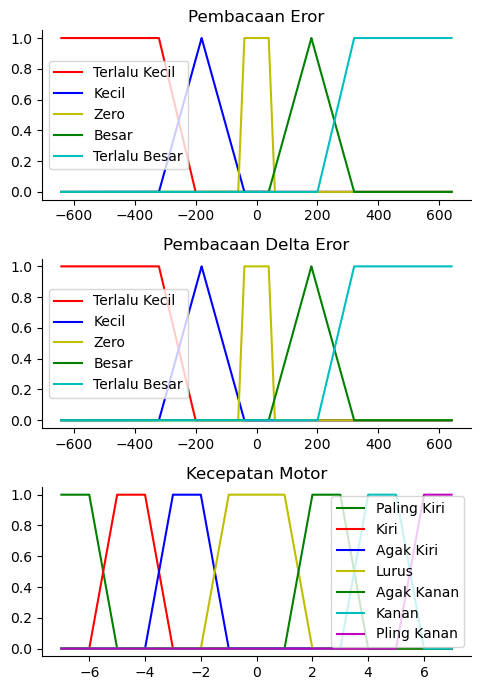

In [5]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Range sensor
x_eror = np.arange(-640, 640, 0.1)
x_delta_eror = np.arange (-640, 640, 0.1)

# Range motor
x_kategori_motor = np.arange(-7, 7, 0.01)

# Pembacaan kamera
eror_terlalu_kecil = fuzz.trapmf(x_eror, [-640, -640, -320, -200])
eror_kecil = fuzz.trimf(x_eror, [-320, -180, -40])
eror_zero = fuzz.trapmf(x_eror, [-60, -40, 40, 60])
eror_besar = fuzz.trimf(x_eror, [40, 180, 320])
eror_terlalu_besar = fuzz.trapmf(x_eror, [200, 320, 640, 640])

delta_terlalu_kecil = fuzz.trapmf(x_delta_eror, [-640, -640, -320, -200])
delta_kecil = fuzz.trimf(x_delta_eror, [-320, -180, -40])
delta_zero = fuzz.trapmf(x_delta_eror, [-60, -40, 40, 60])
delta_besar = fuzz.trimf(x_delta_eror, [40, 180, 320])
delta_terlalu_besar = fuzz.trapmf(x_delta_eror, [200, 320, 640, 640])

#Kecepatan kanan 
motor_paling_kiri_mf = fuzz.trapmf(x_kategori_motor, [-7, -7, -6, -5])
motor_kiri_mf = fuzz.trapmf(x_kategori_motor, [-6, -5, -4, -3])
motor_agak_kiri_mf = fuzz.trapmf(x_kategori_motor, [-4, -3, -2, -1])
motor_lurus_mf = fuzz.trapmf(x_kategori_motor, [-2, -1, 1, 2])
motor_agak_kanan_mf = fuzz.trapmf(x_kategori_motor, [1, 2, 3, 4])
motor_kanan_mf = fuzz.trapmf(x_kategori_motor, [3, 4, 5, 6])
motor_paling_kanan_mf = fuzz.trapmf(x_kategori_motor, [5, 6, 7, 7])

# Visualisasi
fig, (ax0, ax1, ax2 ) = plt.subplots(nrows=3, figsize=(5, 7))

ax0.plot(x_eror, eror_terlalu_kecil, 'r', linewidth=1.5, label='Terlalu Kecil')
ax0.plot(x_eror, eror_kecil, 'b', linewidth=1.5, label='Kecil')
ax0.plot(x_eror, eror_zero, 'y', linewidth=1.5, label='Zero')
ax0.plot(x_eror, eror_besar, 'g', linewidth=1.5, label='Besar')
ax0.plot(x_eror, eror_terlalu_besar, 'c', linewidth=1.5, label='Terlalu Besar')
ax0.set_title('Pembacaan Eror')
ax0.legend()

ax1.plot(x_delta_eror, delta_terlalu_kecil, 'r', linewidth=1.5, label='Terlalu Kecil')
ax1.plot(x_delta_eror, delta_kecil, 'b', linewidth=1.5, label='Kecil')
ax1.plot(x_delta_eror, delta_zero, 'y', linewidth=1.5, label='Zero')
ax1.plot(x_delta_eror, delta_besar, 'g', linewidth=1.5, label='Besar')
ax1.plot(x_delta_eror, delta_terlalu_besar, 'c', linewidth=1.5, label='Terlalu Besar')
ax1.set_title('Pembacaan Delta Eror')
ax1.legend()

ax2.plot(x_kategori_motor, motor_paling_kiri_mf, 'g', linewidth=1.5, label='Paling Kiri')
ax2.plot(x_kategori_motor, motor_kiri_mf, 'r', linewidth=1.5, label='Kiri')
ax2.plot(x_kategori_motor, motor_agak_kiri_mf, 'b', linewidth=1.5, label='Agak Kiri')
ax2.plot(x_kategori_motor, motor_lurus_mf, 'y', linewidth=1.5, label='Lurus')
ax2.plot(x_kategori_motor, motor_agak_kanan_mf, 'g', linewidth=1.5, label='Agak Kanan')
ax2.plot(x_kategori_motor, motor_kanan_mf, 'c', linewidth=1.5, label='Kanan')
ax2.plot(x_kategori_motor, motor_paling_kanan_mf, 'm', linewidth=1.5, label='Pling Kanan')
ax2.set_title('Kecepatan Motor')
ax2.legend()

# Menonaktifkan garis atas/kanan pada plot
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.spines['right'].set_visible(False)
    ax.get_yaxis().tick_left()
plt.tight_layout()
plt.show()

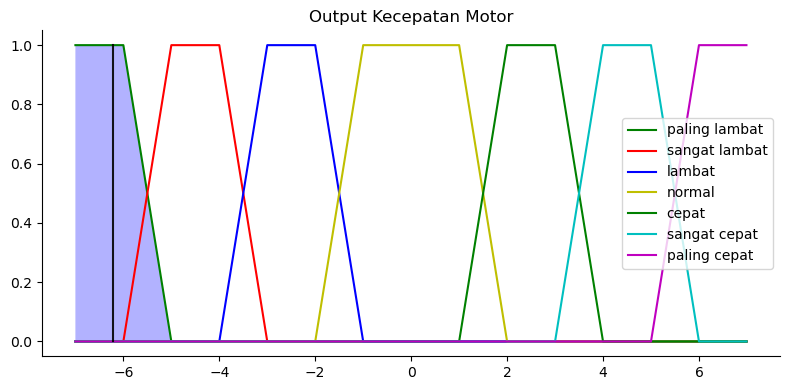

In [10]:
# Membership function untuk pembacaan eror dan delta eror kamera
pembacaan_eror = -400
etki = fuzz.interp_membership(x_eror, eror_terlalu_kecil, pembacaan_eror)
eki = fuzz.interp_membership(x_eror, eror_kecil, pembacaan_eror)
ez = fuzz.interp_membership(x_eror, eror_zero, pembacaan_eror)
eka = fuzz.interp_membership(x_eror, eror_besar, pembacaan_eror)
etka = fuzz.interp_membership(x_eror, eror_terlalu_besar, pembacaan_eror)

pembacaan_delta = -400
dtki = fuzz.interp_membership(x_delta_eror, delta_terlalu_kecil, pembacaan_delta)
dki = fuzz.interp_membership(x_delta_eror, delta_kecil, pembacaan_delta)
dz = fuzz.interp_membership(x_delta_eror, delta_zero, pembacaan_delta)
dka = fuzz.interp_membership(x_delta_eror, delta_besar, pembacaan_delta)
dtka = fuzz.interp_membership(x_delta_eror, delta_terlalu_besar, pembacaan_delta)

#Rules base 
#ETKI (eror terlalu kiri), EKI (eror kiri), EZ (eror zero), EKA (eror kanan), ETKA (eror terlalu kanan)
#DTKI (deltaeror terlalu kiri), DKI (deltaeror kiri), DZ (deltaeror zero), DKA (deltaeror kanan), DTKA (deltaeror terlalu kanan)
rules_1 = np.fmin(etki, dtki)
rules_2 = np.fmin(etki, dki)
rules_3 = np.fmin(etki, dz)
rules_4 = np.fmin(etki, dka)
rules_5 = np.fmin(etki, dtka)
rules_6 = np.fmin(eki, dtki)
rules_7 = np.fmin(eki, dki)
rules_8 = np.fmin(eki, dz)
rules_9 = np.fmin(eki, dka)
rules_10 = np.fmin(eki, dtka)
rules_11 = np.fmin(ez, dtki)
rules_12 = np.fmin(ez, dki)
rules_13 = np.fmin(ez, dz)
rules_14 = np.fmin(ez, dka)
rules_15 = np.fmin(ez, dtka)
rules_16 = np.fmin(eka, dtki)
rules_17 = np.fmin(eka, dki)
rules_18 = np.fmin(eka, dz)
rules_19 = np.fmin(eka, dka)
rules_20 = np.fmin(eka, dtka)
rules_21 = np.fmin(etka, dtki)
rules_22 = np.fmin(etka, dki)
rules_23 = np.fmin(etka, dz)
rules_24 = np.fmin(etka, dka)
rules_25 = np.fmin(etka, dtka)

# Pemggabungan motor kanan
Persentase_paling_kiri =  np.fmin(rules_1, motor_paling_kiri_mf ) 
Persentase_kiri =  np.fmin(np.fmax(rules_2, np.fmax(rules_6, np.fmax(rules_11, rules_16))), motor_kiri_mf )
Persentase_agak_kiri =  np.fmin(np.fmax(rules_3, np.fmax(rules_7, np.fmax(rules_12, np.fmax( rules_17, rules_21)))), motor_agak_kiri_mf )
Persentase_lurus =  np.fmin(np.fmax(rules_4, np.fmax(rules_8, np.fmax(rules_13, np.fmax(rules_18, rules_22)))), motor_lurus_mf )
Persentase_agak_kanan =  np.fmin(np.fmax(rules_5, np.fmax(rules_9, np.fmax(rules_14, np.fmax(rules_19, rules_23)))), motor_agak_kanan_mf )
Persentase_kanan =  np.fmin(np.fmax (rules_10, np.fmax(rules_15, np.fmax(rules_20, rules_24))), motor_kanan_mf )
Persentase_paling_kanan =  np.fmin(rules_25, motor_paling_kanan_mf )


hasil_motor = np.zeros_like(x_kategori_motor)

# Defuzzifikasi kanan
aggregated_motor = np.fmax(Persentase_paling_kiri, np.fmax(Persentase_kiri, np.fmax(Persentase_agak_kiri, np.fmax(Persentase_lurus,  np.fmax(Persentase_agak_kanan,  np.fmax(Persentase_kanan, Persentase_paling_kanan))))))
kecepatan_motor= fuzz.defuzz(x_kategori_motor, aggregated_motor, 'centroid')
hasil_vic= fuzz.interp_membership(x_kategori_motor, aggregated_motor, kecepatan_motor)

# Visualisasi
fig, ax2 = plt.subplots(figsize=(8, 4))

ax2.plot(x_kategori_motor, motor_paling_kiri_mf, 'g', linewidth=1.5, label='Paling Kiri')
ax2.plot(x_kategori_motor, motor_kiri_mf, 'r', linewidth=1.5, label='Kiri')
ax2.plot(x_kategori_motor, motor_agak_kiri_mf, 'b', linewidth=1.5, label='Agak Kiri')
ax2.plot(x_kategori_motor, motor_lurus_mf, 'y', linewidth=1.5, label='Lurus')
ax2.plot(x_kategori_motor, motor_agak_kanan_mf, 'g', linewidth=1.5, label='Agak Kanan')
ax2.plot(x_kategori_motor, motor_kanan_mf, 'c', linewidth=1.5, label='Kanan')
ax2.plot(x_kategori_motor, motor_paling_kanan_mf, 'm', linewidth=1.5, label='Pling Kanan')
ax2.fill_between(x_kategori_motor, hasil_motor, aggregated_motor, facecolor='b', alpha=0.3)
ax2.plot([kecepatan_motor, kecepatan_motor], [0, hasil_vic], 'k', linewidth=1.5, alpha=0.9)
ax2.set_title('Output Kecepatan Motor')
ax2.legend()

# Matikan sumbu atas/kanan
for ax in (ax2,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()

In [4]:
kecepatan_motor

-6.222222222222222